# Customer Analysis

In [17]:
# -------------------------------------------------------------------
# Setup cell — place this at the top of every analysis notebook
# -------------------------------------------------------------------
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

df = pd.read_csv("../datasets/customer_shopping_data_v5.csv")
sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

1. age ↔ total_spend <br>
Does the total spend increase with age?

2. age ↔ transaction_count <br>
Do younger or older customers shop more frequently?

3. gender ↔ total_spend <br>
Is there a difference in spending levels between men and women?

4. age_group ↔ Econ_Conf_level <br>
Do different age groups respond differently to economic fluctuations?

5. gender ↔ Econ_Conf_level <br>
Do genders respond differently to economic fluctuations?

6. gender ↔ category <br>
Do product category preferences vary by gender?

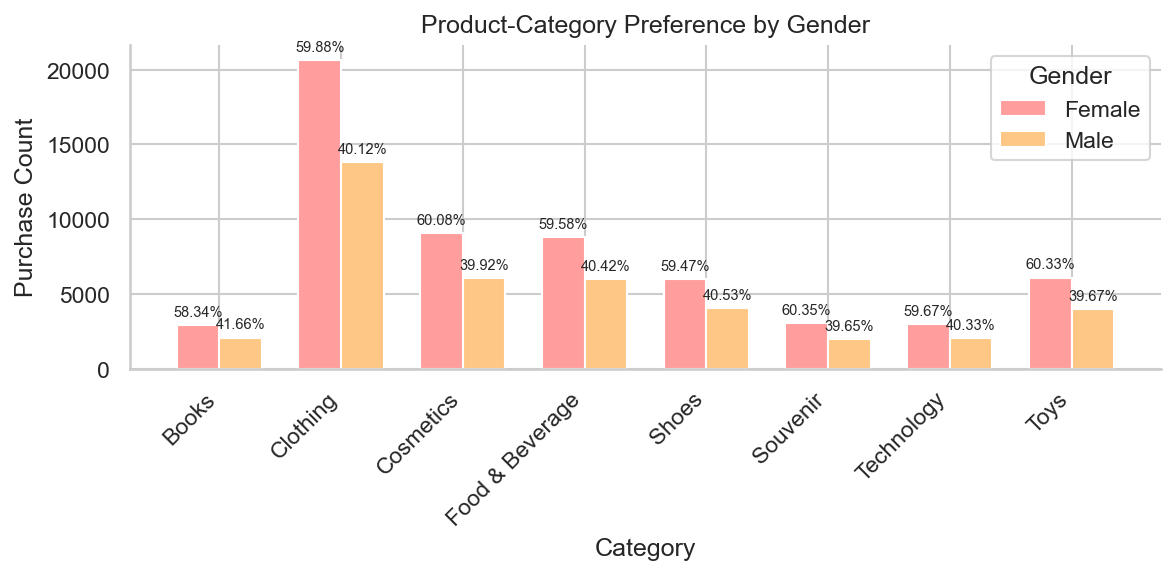


Observed counts:
gender           Female   Male
category                      
Books              2906   2075
Clothing          20652  13835
Cosmetics          9070   6027
Food & Beverage    8804   5972
Shoes              5967   4067
Souvenir           3017   1982
Technology         2981   2015
Toys               6085   4002

Expected counts under H0:
gender             Female      Male
category                           
Books             2978.97   2002.03
Clothing         20625.55  13861.45
Cosmetics         9029.03   6067.97
Food & Beverage   8837.05   5938.95
Shoes             6001.01   4032.99
Souvenir          2989.74   2009.26
Technology        2987.95   2008.05
Toys              6032.71   4054.29
χ² = 7.5679  (df=7)   p = 0.3722
At 95 % confidence, no significant gender effect on category preference.


In [18]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ ANALYSIS 6: Do product-category preferences vary by gender?  ║
# ╚══════════════════════════════════════════════════════════════╝
ct = pd.crosstab(df["category"], df["gender"])
cats    = ct.index.tolist()
genders = ["Female", "Male"]
gender_colors = {"Female": color1, "Male": color2}
x       = np.arange(len(cats))
width   = 0.35

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
for i, g in enumerate(genders):
    counts = ct[g].values
    barpos = x + (i-0.5)*width
    ax.bar(barpos, counts, width=width,
           color=gender_colors[g], label=g)
    pct = (counts / ct.sum(axis=1).values) * 100
    for j,(c,pcent) in enumerate(zip(counts,pct)):
        ax.text(barpos[j], c+max(ct.values.max()*0.02,1),
                f"{pcent:.2f}%", ha="center", va="bottom", fontsize=7)

ax.set_xticks(x); ax.set_xticklabels(cats, rotation=45, ha="right")
ax.set_ylabel("Purchase Count")
ax.set_xlabel("Category")
ax.set_title("Product-Category Preference by Gender")
ax.legend(title="Gender")
sns.despine()
plt.tight_layout()
plt.savefig("dataset_customer_analysis_figures/gender_category_6.png", dpi=150)
plt.show()

chi2,p,dof,exp = stats.chi2_contingency(ct)

# Convert expected array to DataFrame with same labels
expected_df = pd.DataFrame(exp, index=ct.index, columns=ct.columns)

print("\nObserved counts:")
print(ct)

print("\nExpected counts under H0:")
print(expected_df.round(2))   # round to 2 decimals

print(f"χ² = {chi2:.4f}  (df={dof})   p = {p:.4f}")
print("At 95 % confidence, category preference **differs** by gender."
      if p<0.05 else
      "At 95 % confidence, no significant gender effect on category preference.")


7. age_group ↔ category <br>
Do product category preferences change significantly by age group

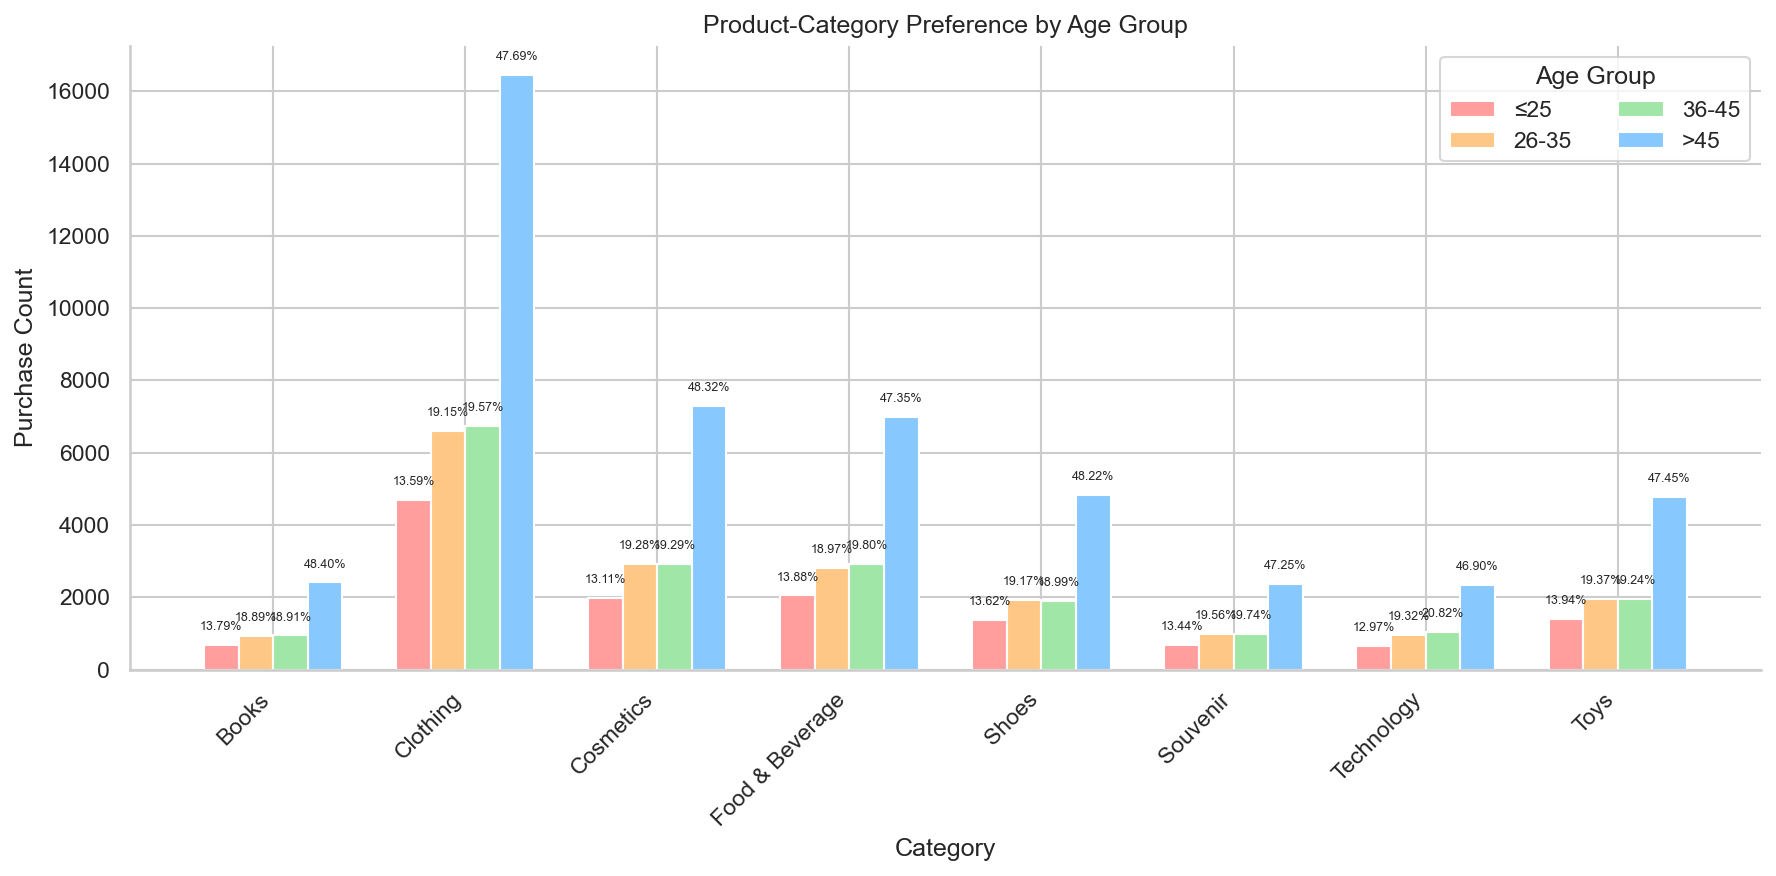


Observed counts:
age_group         ≤25  26-35  36-45    >45
category                                  
Books             687    941    942   2411
Clothing         4686   6605   6749  16447
Cosmetics        1979   2911   2912   7295
Food & Beverage  2051   2803   2925   6997
Shoes            1367   1924   1905   4838
Souvenir          672    978    987   2362
Technology        648    965   1040   2343
Toys             1406   1954   1941   4786

Expected counts under H0:
age_group            ≤25    26-35    36-45       >45
category                                            
Books             675.91   955.61   971.64   2377.84
Clothing         4679.78  6616.39  6727.35  16463.48
Cosmetics        2048.62  2896.39  2944.96   7207.04
Food & Beverage  2005.06  2834.80  2882.34   7053.80
Shoes            1361.58  1925.04  1957.32   4790.05
Souvenir          678.35   959.07   975.15   2386.43
Technology        677.94   958.49   974.57   2385.00
Toys             1368.77  1935.21  1967.66   481

In [20]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ ANALYSIS 7: Do category preferences change by age group?     ║
# ╚══════════════════════════════════════════════════════════════╝
age_bins  = [0,25,35,45,120]
age_labels= ["≤25","26-35","36-45",">45"]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

ct = pd.crosstab(df["category"], df["age_group"])
cats      = ct.index.tolist()
groups    = age_labels
x         = np.arange(len(cats))
width     = 0.18
group_colors = ["#FF9E9D","#FFC785","#A0E6A6","#87C8FF"]

fig, ax = plt.subplots(figsize=(12,6), dpi=150)
for i,(grp,color) in enumerate(zip(groups,group_colors)):
    counts = ct[grp].values
    barpos = x + (i - (len(groups)-1)/2)*width
    ax.bar(barpos, counts, width=width,
           color=color, label=grp)
    pct = (counts / ct.sum(axis=1).values) * 100
    for j,(c,pcent) in enumerate(zip(counts,pct)):
        ax.text(barpos[j], c+max(ct.values.max()*0.02,1),
                f"{pcent:.2f}%",
                ha="center", va="bottom", fontsize=6)

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha="right")
ax.set_ylabel("Purchase Count")
ax.set_xlabel("Category")
ax.set_title("Product-Category Preference by Age Group")
ax.legend(title="Age Group", ncol=2)
sns.despine()
plt.tight_layout()
plt.savefig("dataset_customer_analysis_figures/age_group_category_7.png", dpi=150)
plt.show()

chi2,p,dof,exp = stats.chi2_contingency(ct)

# Convert expected array to DataFrame with same labels
expected_df = pd.DataFrame(exp, index=ct.index, columns=ct.columns)

print("\nObserved counts:")
print(ct)

print("\nExpected counts under H0:")
print(expected_df.round(2))   # round to 2 decimals

print(f"χ² = {chi2:.4f}  (df={dof})   p = {p:.4f}")
print("At 95 % confidence, category preference **varies** across age groups."
      if p<0.05 else
      "At 95 % confidence, no significant age-group effect on category preference.")